## HW0: Python and Optimization Set-up
### EEEL 4220 Fall 2023

Author: Ningkun Zheng, Bolun Xu

### Intro

This script introduces the recommended set-up for using programming to solve optimization problems with Conda + Jupyter Notebook + Python + CVXPY + Gurobi.

**If this is the your first time using Jupyter Notebook:** This script is generated using Jupyter Notebook, an application for you to write codes and texts using two different formats, as you will see later in this script. You can also observe your code results directly under each cell, and save the entire workspace into ``.html`` or ``.pdf`` format. After you have setted up everything in this file, you can run ``CVX_setup_and_examples.ipynb`` file and it should generate the same view as in this file.

[Conda][0] is a programming environment management system that *protects* your computer from any potential *skewed-ups*. Note that in many programming tasks, not limited to the ones in this course, we will be dealing with open-source software and packages that do not come with warranties. If you installed everything directly on your root environment, you may ended up encourter errors from improper installations, or sometimes packages just don't work with each other. Instead, Conda allows you to "seal" everything inside an environment which you can create, duplicate, or delete. So if things went wrong and you don't know how to fix, you can simply delete everything, create a new environment, and start a new life. 

[Jupyter Notebook][1] is the developentor application in which you type your code and observe the results. You can also write normal text in it. This script is written with Jupyter Notebook.

[Python][2] is the programming language which compiles your code into a program.

[CVXPY][3] is a package in Python that translates your code into a form that feeds into the solver software.

[Gurobi][4] is our preferred solver that does the actual heavy-lifting to solve the optimization. CVXPY comes with a few free open-source solvers but their computation speed and accuracy is not ideal. Gurobi is the ones of the fastest and most reliable optimization solver. As a Columbia University student (or most educational users), you can use Gurobi for free. Otherwise, using Gurobi could cost you quite a bit. 

PS: **Do not install anything yet! Follow the instruction below.**

[0]: https://www.anaconda.com/
[1]: https://jupyter.org/
[2]: https://www.python.org/
[3]: https://www.cvxpy.org/
[4]: https://www.gurobi.com/

### Setting up the *environment*

* Our first step is to install the conda environment. You can go to [here][1] and choose to install the open source individual version, follow the instructions.

* If you are not familiar with conda, please review the [concept of conda][2] and find some useful operation for conda environment in this [conda cheat sheet][3]

* Then open Anaconda Command Prompt/Terminal (Window/MacOS), enter the command below, replace **{YourEnvName}** with your prefered enviromment name such as "PyOpt" (you can use any name you like). Note that this environment comes with Python version 3.8 and some basic packages, so you don't need to install Python separately. 
>~~~
> conda create --name {YourEnvName} python = 3.8
>~~~

* Enter the command below in terminal, you will find the prefix become your enviroment name instead of "base" environment. Install packages in "base" environment is not recommended.
>~~~
> conda activate {YourEnvName}
>~~~

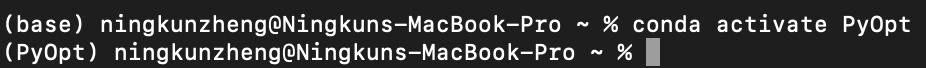

* In the terminal, install Jupyter in your new environment by typing the following command
>~~~
> pip install jupyterlab
>~~~

* In the terminal, install CVXPY in your new environment by typing the following command. You can use **pip install** and **conda install** to install any other Python packages, check the package document for more install instruction.
>~~~
> pip install cvxpy
>~~~
* In the terminal, enter following command, then in the file directory of Jupyter Notebook homepage, open ``CVX_setup_and_examples.ipynb``. 
>~~~
> jupyter notebook
>~~~
* You have now setted up everything except of the Gurobi solver, and opened the scripted that generated this instruction. You can now use free solvers to perform optimization.

[1]: https://www.anaconda.com/products/distribution
[2]: https://conda.io/projects/conda/en/latest/user-guide/concepts/index.html
[3]: https://conda.io/projects/conda/en/latest/user-guide/cheatsheet.html

### Introduction to Python 

**Basic coding skills is required in this course.** If you have experience in other language but not familiar with Python, use can use this [link](https://www.datacamp.com/groups/shared_links/a4c846b134cc0dde6ef6cf2504b06c61c55ced7b9f8cfdf28811bd634554463b) to finish a free Python tutorial provided by Datacamp.com. 

**Make sure your are comfortable to answer following questions.**



1. Write a `for` loop to print a number sequence with size 20 start with 1 and gap is 3 (1,4,7,...).

In [ ]:
### Your code in this cell


2. Write a `while` loop to print a number of sequence start with 2 and gap is 4, up to 50.

In [ ]:
### Your code in this cell


3. Take two interger values and print greatest among them.


In [ ]:
### Your code in this cell
a = 
b =

4. Define a vector with the following elements: 1, 2, 3, 4, 5. Output the sum of the second and the fourth element.

In [ ]:
### Your code in this cell


5. Using a `for` loop, calculate and output the sum of every two different elements from the above five element array, for example, sum of 1st and 2nd, 1st and 3rd, ...

In [ ]:
### Your code in this cell



6. Import `numpy` package. Create two 5*5 random Numpy 2-d array, A and B.

In [ ]:
### Your code in this cell



7. Calculate following operation of A and B:
* Inner product
* Dot product
* Transpose
* Trace
* Rank
* Determinant
* Inverse
* Flatten
* Eigenvalues and eigenvectors

In [ ]:
### Your code in this cell



### Check Optimization Set-up
The following section includes two examples of using Python and CVXPY to solve simple optimization problems. You don't need to write any codes in this part. Use these tests to see if you have set up your environment successfully.


We check the installation first by listing all installed optimization solvers. You should see the following message printed if you havent't installed Gurobi yet
>~~~
> Current installed solvers:  ['ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']
>~~~

In [ ]:
import cvxpy as cp

# Print the installed solver to see if GUROBI is installed correctly
print("Current installed solvers: ", cp.installed_solvers())

###  Example: Linear Program

We start by performing a linear programming example:

**Test 1:**  
***x<sub>1</sub>, x<sub>2</sub>*** and ***x<sub>3</sub>*** are **nonnegative variables** that satisfy the following relationships:
  
*x<sub>1</sub>* + *x<sub>2</sub>* $\le$ 3  
*x<sub>2</sub>* + *x<sub>3</sub>* $\le$ 10  
*x<sub>3</sub>*  $\ge$ 0

What is the minimum value of  ***x<sub>1</sub> + 3x<sub>2</sub> - 2x<sub>3</sub>*** ?

#### Step One: define variables

The first step of programming an optimization problem is to define the variables. Here we define three variables ``x1, x2, x3`` all as nonnegative variables, so that the optimization will only search for nonnegative values for these three variables. 

This is equivalent to adding $x_1 \geq 0$, $x_2 \geq 0$, $x_3 \geq 0$ to constriants, but easier to type as it is very common for engineering problems to require nonnegative values.

Note in the code syntax that we start with ``cp.`` because we have imported ``cvxpy`` as ``cp`` earlier.

In [ ]:
# Define nonnegative variables x1, x2, and x3
x1 = cp.Variable(nonneg = True)
x2 = cp.Variable(nonneg = True)
x3 = cp.Variable(nonneg = True)

Next, we define constraints as

In [ ]:
# Define constraints
con = [x1 + x2 <= 3,
       x2 + x3 <= 10,
       x3 >= 0] # Equavalent to nonnegative variable x3

Now we define the objective function as

In [ ]:
# Define the objective
obj = cp.Minimize(x1 + 3*x2 -2*x3)

We now assemble the our objective function ``obj`` and constraints ``con`` into an optimization problem named ``prob1``

In [ ]:
# Solve the problem
prob1 = cp.Problem(obj, con)

Now we solve this problem with the default ECOS solver

In [ ]:
prob1.solve(solver = None) # You may specify the solver here, 
                           # otherwise ECOS is used for LPs by default



Print the results. The optimized objective value is stored in ``prob1.value``. To look up variables values, use ``x1.value`` (remember ``x1`` is defined as a CVXPY variable instead of a regular Python variable.)

In [ ]:
print("Optimal value: ", prob1.value)
print("Optimal variables: ", f"x1={x1.value}, x2={x2.value}, x3={x3.value}")

#### Test 2:

We now demonstrate an optimization example by defining the problem directly using matrix format instead of equation sets 

Minimize ***c<sup>T</sup>x***, where nonnegative variable ***x*** is subject to ***Ax $\ge$ b***, given
  
$c= \begin{bmatrix}4\\5\\6
\end{bmatrix}$,
$A = \begin{bmatrix}3 & 2 & 1\\
                        2 & -2& 2\\
                        1 & 2 & -3
\end{bmatrix}$,
$b= \begin{bmatrix}1\\3\\5
\end{bmatrix}$  


First we need to import ``numpy`` to support matrix operations

In [ ]:
# Import Numpy to input arrays and matrix
import numpy as np

We first define vector and matrix parameters using ``numpy``

In [ ]:
# Define parameters
c = np.array((4, 5, 6))
A = np.array([(3, 2, 1),
              (2,-2, 2),
              (1, 2,-3)])
b = np.array((1, 3, 5))

Now we define variable ``x`` as a vector with the same length as ``c``

In [ ]:
# You can define a vector or matrix variable, by defining the size of it
# In this case, we define an array-like variable with a proper size, which is 3 in this case
x = cp.Variable(len(c), nonneg = True)

Define the optimization problem as ``prob2``. Use ``@`` to represent matrix multiplications, i.e., $c^\top x$ will be programmed to ``c.T @ x``

In [ ]:
# Create and Solve the problem
prob2 = cp.Problem(cp.Minimize(c.T @ x), # Define objective, c needs to be transposed
                   [A @ x >= b])       # Define constraint

Solve the optimization problem

In [ ]:
prob2.solve(solver = None) 

Print the results

In [ ]:
# Print result
print("Optimal value: ", prob2.value)
print("Optimal variables: ", f"x={x.value}")


Or

In [ ]:
print("Optimal variables: ", f"x1={x[0].value}, x2={x[1].value}, x3={x[2].value}")